# Question 0

In [22]:
import pandas as pd
from plotnine import *

#Data Import
avocado = pd.read_csv("/Users/AustinLiu/Desktop/GSB544-ComputingandMachineLearning/Lab_Data/avocado-updated-2020.csv")


# Question 1

This data set represents weekly retail data for Hass Avocados sold from 2015 to 2020. This data set includes the date, average price of a single avocado, the type of avocado, year, city or region, total volume of avocados sold, and total number of avocados sold by product look up number.

# Question 2

In [23]:
avocado = avocado.rename(columns={
    '4046': 'SmallAvo',
    '4225': 'LargeAvo',
    '4770': 'XLargeAvo'
})


In [24]:
region = pd.DataFrame({"geography": ["West", "Northeast", "South Central", "Southeast", "Great Lakes", "Plains", "Midsouth", "West Tex/New Mexico"]})

regions = avocado.merge(region, on = 'geography', how = 'inner')

In [25]:
region = pd.DataFrame({"geography": ["West", "Northeast", "South Central", "Southeast", "Great Lakes", "Plains", "Midsouth", "West Tex/New Mexico"]})

regions = avocado.merge(region, on = 'geography', how = 'inner')

state = pd.DataFrame({"geography": ["California", "New York", "South Carolina"]})

states = avocado.merge(state, on = 'geography', how = 'inner')


excluded_geography = ["Total U.S.", "West", "Northeast", "South Central", "Southeast", "Great Lakes", 
                        "Plains", "Midsouth", "West Tex/New Mexico", 
                        "California", "New York", "South Carolina"]

#Assisted by GPT on next line
metro = avocado[~avocado["geography"].isin(excluded_geography)]


# Question 3

In [26]:
q3 = regions[(regions["year"] == 2017) & (regions["type"] == "organic")]

q3.groupby('geography')['SmallAvo'].sum()

geography
Great Lakes             202487.68
Midsouth                186395.50
Northeast               925832.36
Plains                  168583.40
South Central          1717104.19
Southeast               285124.34
West                   1870206.29
West Tex/New Mexico     110910.95
Name: SmallAvo, dtype: float64

The West region sold the most small organic Hass Avocados in 2017.

# Question 4

In [27]:
avocado[['Year', 'Month', 'Day']] = avocado['date'].str.split('-', expand = True)


avocado.groupby('Month').agg({'total_volume': 'mean'})

,total_volume
Month,
01,9.853122e+05
02,1.095374e+06
03,9.957150e+05
04,1.016582e+06
05,1.123632e+06
06,1.051247e+06
07,9.832681e+05
08,9.499249e+05
09,9.064773e+05


May had the highest average volume of avocados sold at 1,123,632 (1.123632 X10^6).

# Question 5

In [28]:
top_5_regions = (metro.loc[:, ["total_volume", "geography"]]
                 .groupby('geography')
                 .agg('mean')
                 .sort_values(by = 'total_volume', ascending = False).head(5)
                 .reset_index())
top_5_regions

,geography,total_volume
0,Los Angeles,1.567566e+06
1,Dallas/Ft. Worth,7.127519e+05
2,Houston,6.876533e+05
3,Phoenix/Tucson,6.250383e+05
4,Denver,4.541332e+05


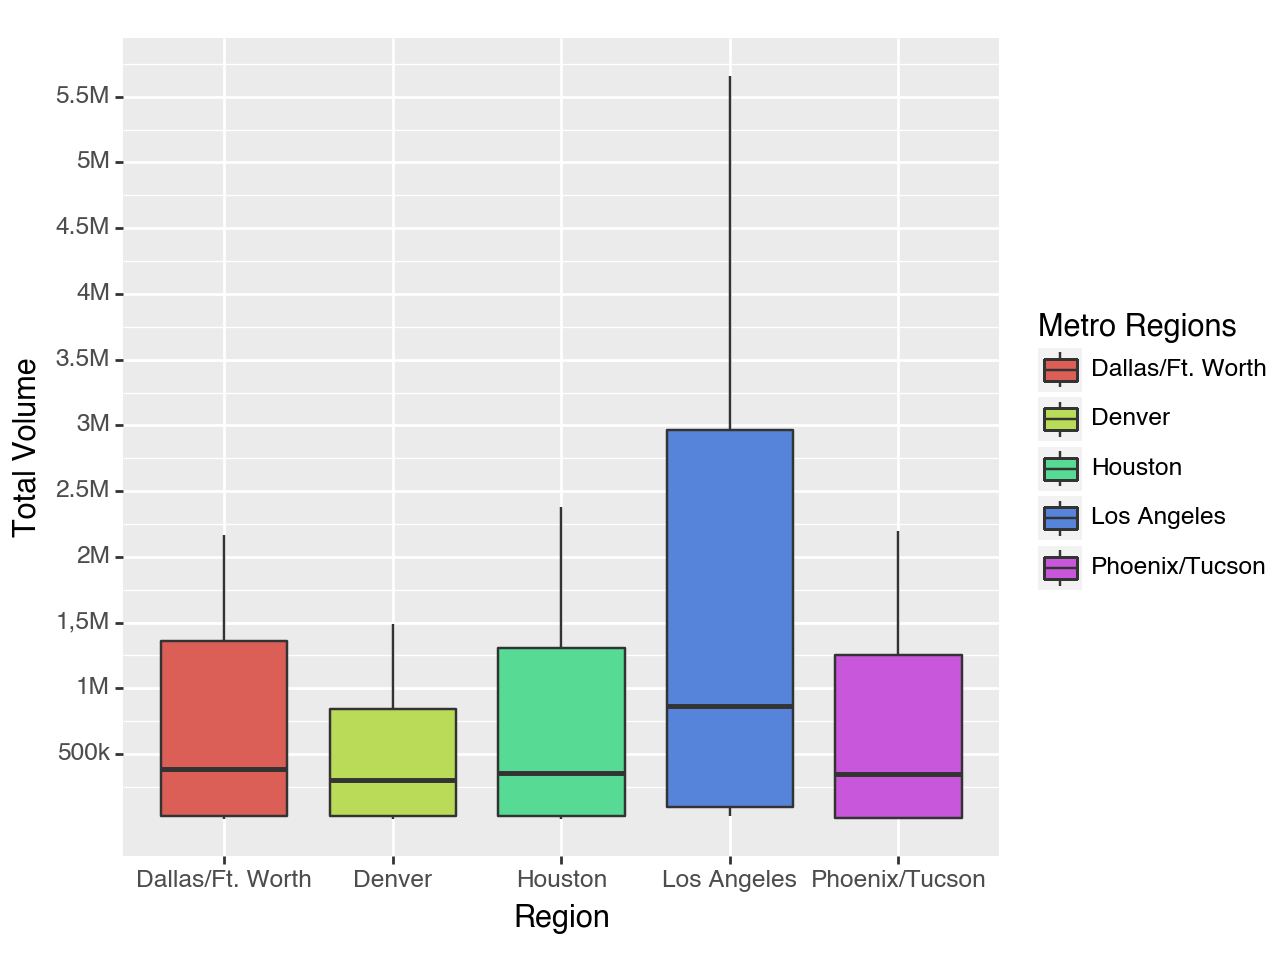

<Figure Size: (640 x 480)>

In [29]:
top_5_metro = pd.DataFrame({"geography": ["Los Angeles", "Dallas/Ft. Worth", "Houston", "Phoenix/Tucson", "Denver"]})
top_5_boxplot = avocado.merge(top_5_metro, on = 'geography', how = 'inner')


(ggplot(top_5_boxplot, aes(y = "total_volume", x = "geography", fill = "geography"))
+ geom_boxplot()
+ labs(x = "Region", y = "Total Volume", fill = "Metro Regions")
+ scale_y_continuous(
    breaks = [500000, 1000000, 1500000, 2000000, 2500000, 3000000, 
              3500000, 4000000, 4500000, 5000000, 5500000], 
    labels  = ["500k", "1M", "1,5M", "2M","2.5M", "3M", "3.5M", "4M",
                               "4.5M", "5M", "5.5M"]))

# Question 6

In [30]:
cali = pd.DataFrame({'geography': ['Sacramento', 'Los Angeles', 'San Diego', 'San Francisco']})

california = pd.merge(avocado, cali, on = 'geography', how = 'inner')

california

,date,average_price,total_volume,SmallAvo,LargeAvo,XLargeAvo,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Year,Month,Day
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,2015,01,04
1,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,2015,01,04
2,2015-01-11,0.85,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,conventional,2015,Los Angeles,2015,01,11
3,2015-01-11,1.08,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,organic,2015,Los Angeles,2015,01,11
4,2015-01-18,0.89,2800679.50,1925013.31,526106.80,59364.23,290195.16,260857.96,26671.18,2666.02,conventional,2015,Los Angeles,2015,01,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2020-11-15,1.78,61454.10,4727.34,5548.32,0.00,51178.44,51088.34,90.10,0.00,organic,2020,San Francisco,2020,11,15
2444,2020-11-22,1.28,778476.27,156625.29,167370.28,4767.84,449712.86,187499.75,257065.31,5147.80,conventional,2020,San Francisco,2020,11,22
2445,2020-11-22,1.87,59882.68,3110.05,4956.81,4.17,51811.65,51680.30,131.35,0.00,organic,2020,San Francisco,2020,11,22
2446,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,2020,11,29


# Question 7

In [31]:
diff = california.groupby(by = ["geography", "type"])[["average_price"]].mean().reset_index()
diff

,geography,type,average_price
0,Los Angeles,conventional,1.047124
1,Los Angeles,organic,1.574902
2,Sacramento,conventional,1.295359
3,Sacramento,organic,1.873856
4,San Diego,conventional,1.113856
5,San Diego,organic,1.798366
6,San Francisco,conventional,1.400490
7,San Francisco,organic,2.119444


In [32]:
(california.pivot_table(index = 'geography', columns = "type", values = 'average_price').reset_index())

type,geography,conventional,organic
0,Los Angeles,1.047124,1.574902
1,Sacramento,1.295359,1.873856
2,San Diego,1.113856,1.798366
3,San Francisco,1.400490,2.119444


1.574902 - 1.047124 = 0.527778

1.873856 - 1.295359 = 0.578497

1.798366 - 1.113856 = 0.68451

2.119444 - 1.400490 = 0.718954

San Francisco has the largest difference between conventional and organic Hass Avocados.


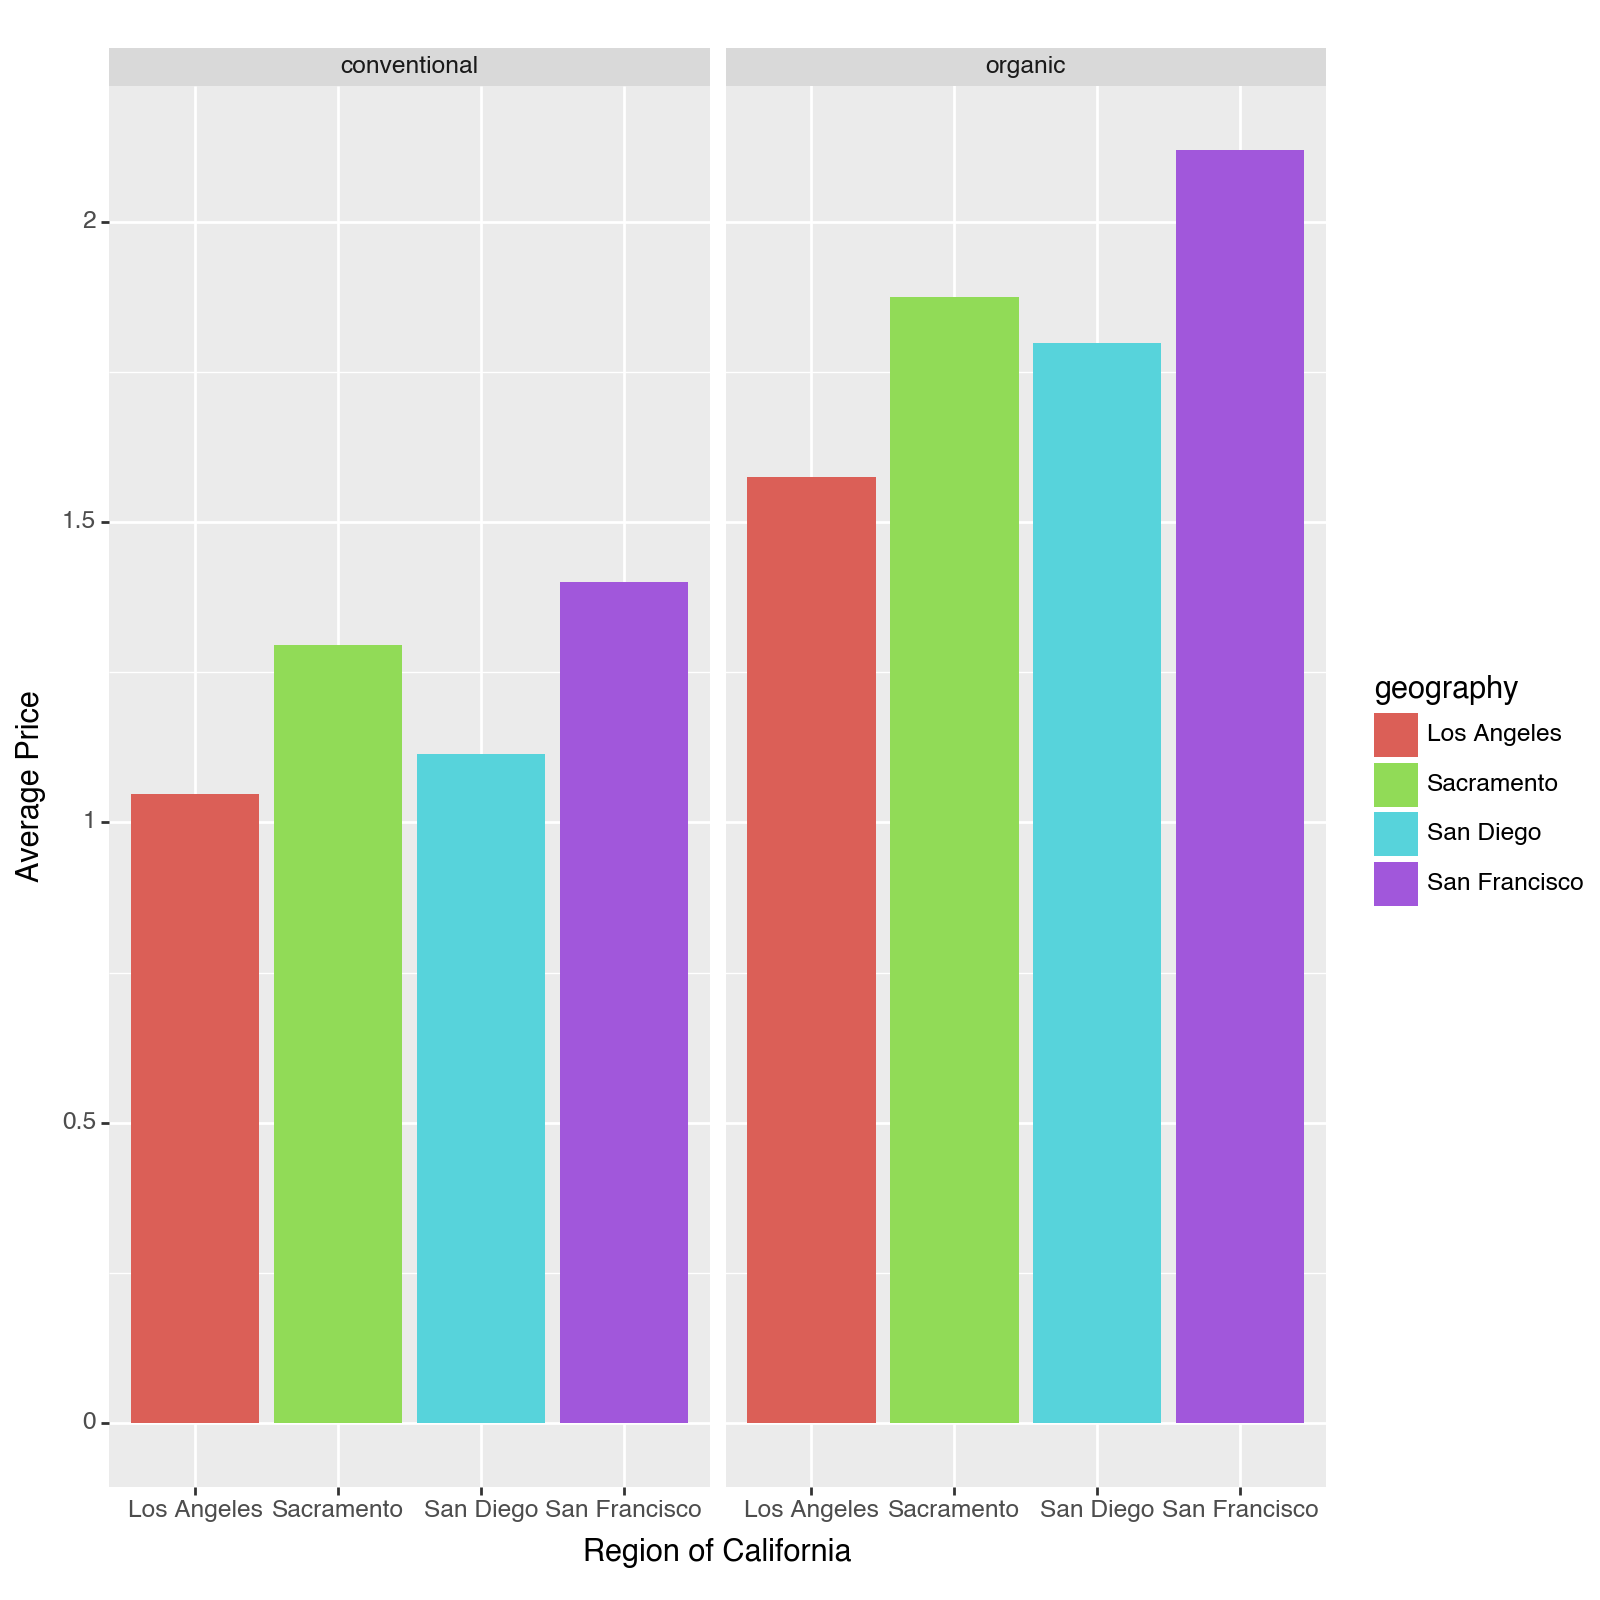

<Figure Size: (800 x 800)>

In [33]:
(ggplot(diff, aes(x = "geography", y = "average_price", fill = "geography")) 
 + geom_col()
 + facet_wrap("type")
 + theme(figure_size = (8,8))
 + labs(x = "Region of California", y = "Average Price"))

# Question 8

In [34]:
#Assisted by GPT on .apply() line

proportions = (california
               .melt(id_vars = ['geography', 'type'], 
                     value_vars =['SmallAvo', 'LargeAvo', 'XLargeAvo'], 
                     var_name = 'Avocado_Size', 
                     value_name = 'NumAvoSold')
               .groupby(['geography', 'type'], group_keys = False)
               .apply(lambda x: x.assign(Frequency = x['NumAvoSold'] / x['NumAvoSold'].sum()))
               .reset_index(drop = True))
proportions

,geography,type,Avocado_Size,NumAvoSold,Frequency
0,Los Angeles,conventional,SmallAvo,1837999.65,3.504665e-03
1,Los Angeles,organic,SmallAvo,47721.51,4.423897e-03
2,Los Angeles,conventional,SmallAvo,1786326.65,3.406136e-03
3,Los Angeles,organic,SmallAvo,52087.31,4.828617e-03
4,Los Angeles,conventional,SmallAvo,1925013.31,3.670581e-03
...,...,...,...,...,...
7339,San Francisco,organic,XLargeAvo,0.00,0.000000e+00
7340,San Francisco,conventional,XLargeAvo,4767.84,2.290848e-05
7341,San Francisco,organic,XLargeAvo,4.17,6.933220e-07
7342,San Francisco,conventional,XLargeAvo,5597.21,2.689343e-05


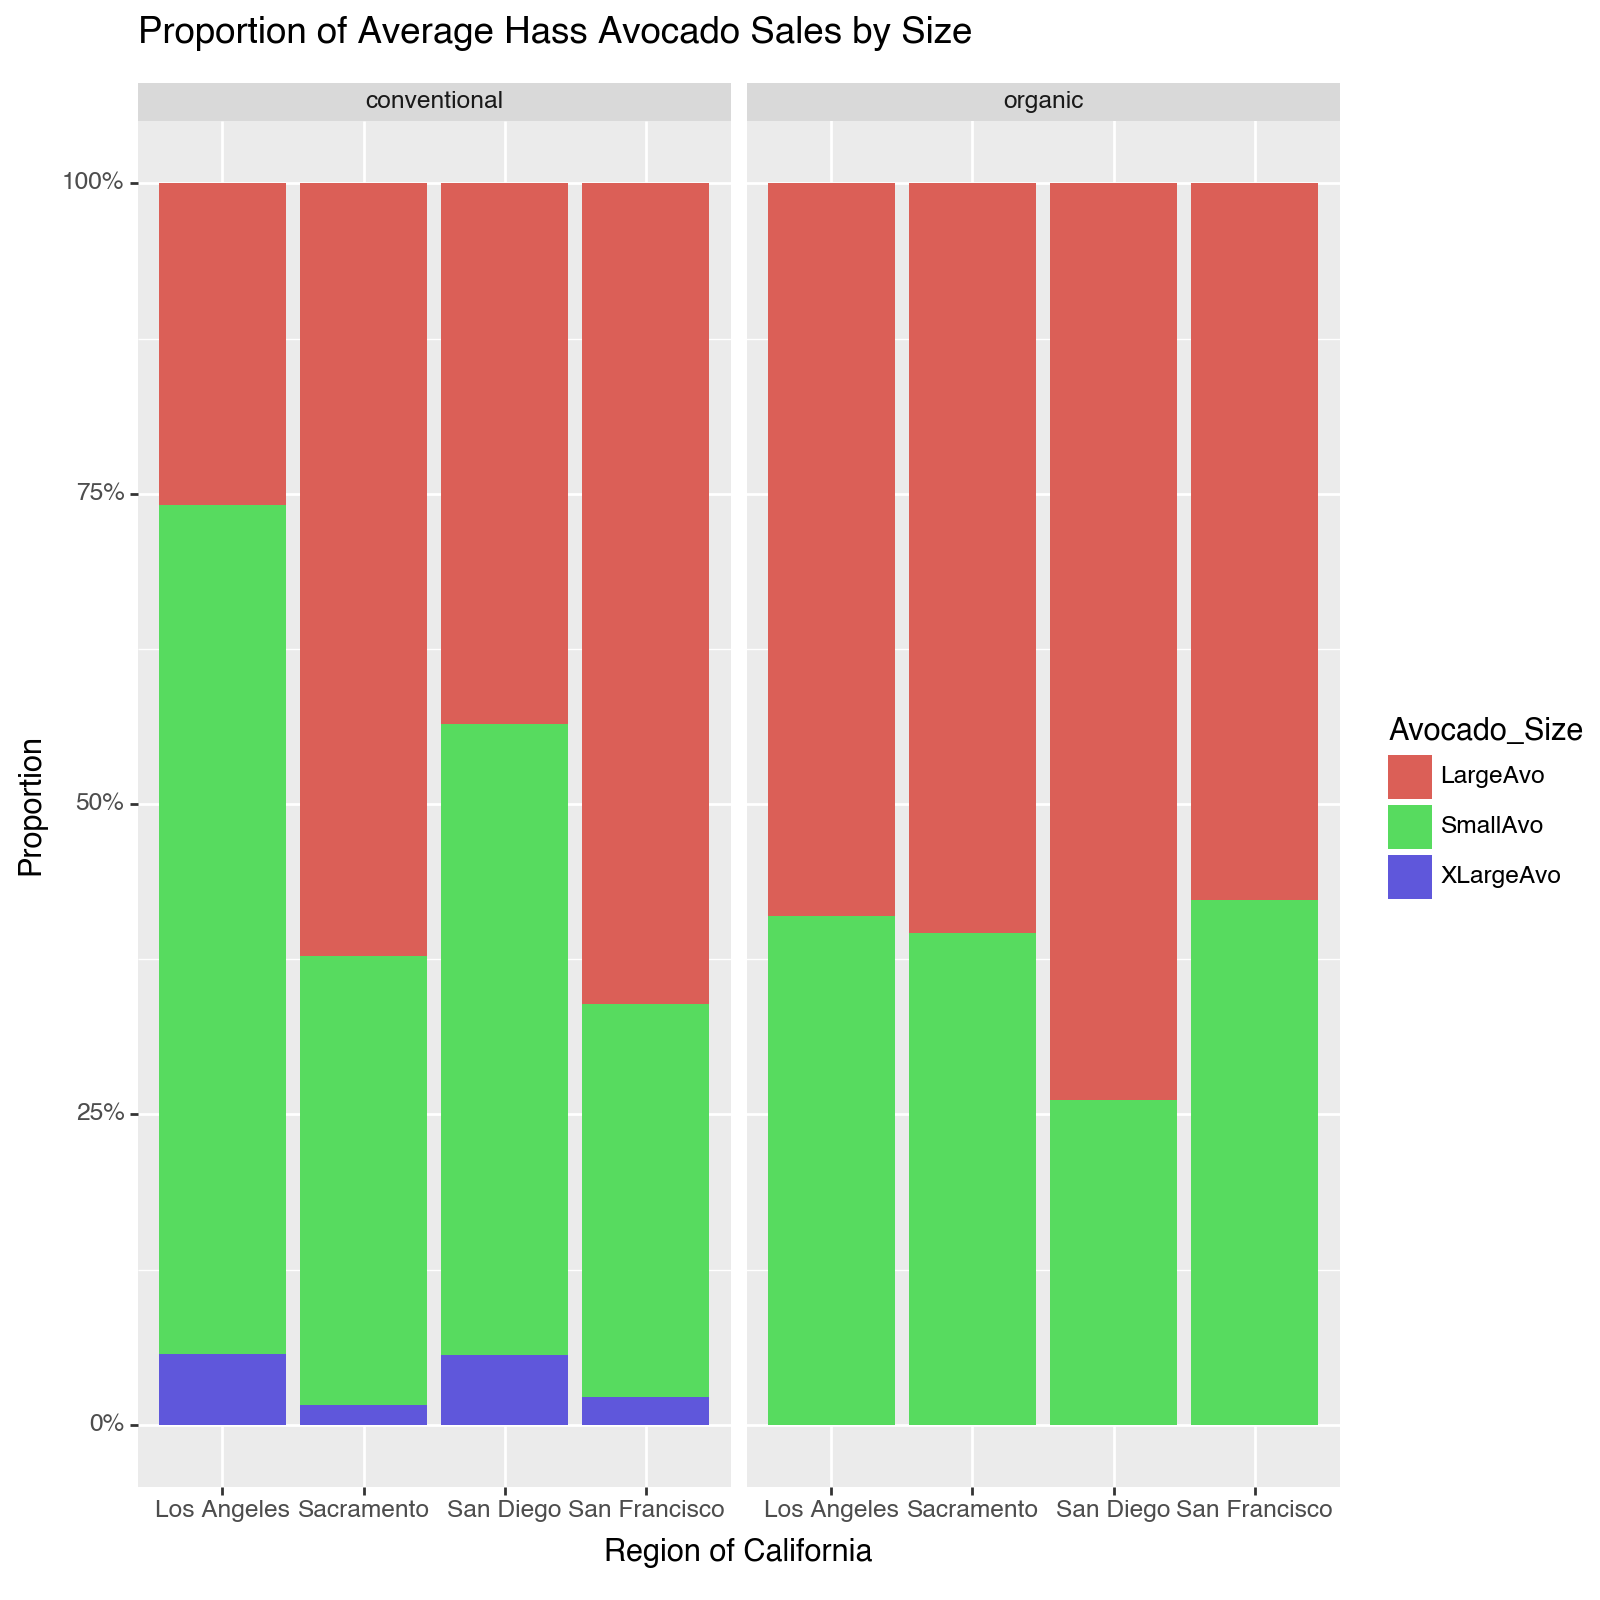

<Figure Size: (800 x 800)>

In [35]:
(ggplot(proportions, aes(x = "geography", y = "Frequency", fill = "Avocado_Size")) 
 + geom_col()
 + facet_wrap("type")
 + theme(figure_size = (8,8))
 + scale_y_continuous(breaks = [0, 0.25, 0.5, 0.75, 1], labels = ["0%", "25%", "50%", "75%", "100%"])
 + labs(x = "Region of California", y = "Proportion", title = "Proportion of Average Hass Avocado Sales by Size"))

# Using Outside Data

This data was obtained from the newhomesdirectory.com website under the historical housing market report for the years 2015-2020 in the corresponding metropolitan cities. This data represents the average price sold for detached homes between 2000 and 2500 square feet. I then created my own dataset in excel with data values that I gathered.

In [36]:
house = pd.read_excel("/Users/AustinLiu/Desktop/GSB544-ComputingandMachineLearning/Lab_Data/homeprice.xlsx")
house

,geography,year,Price
0,Los Angeles,2015,1167880
1,San Diego,2015,757981
2,Sacramento,2015,280000
3,San Francisco,2015,1283699
4,Los Angeles,2016,1157514
5,San Diego,2016,784896
6,Sacramento,2016,349000
7,San Francisco,2016,1253532
8,Los Angeles,2017,1419556
9,San Diego,2017,948784


In [37]:
avohouse = pd.merge(california, house, on = ["geography", "year"], how = "left")

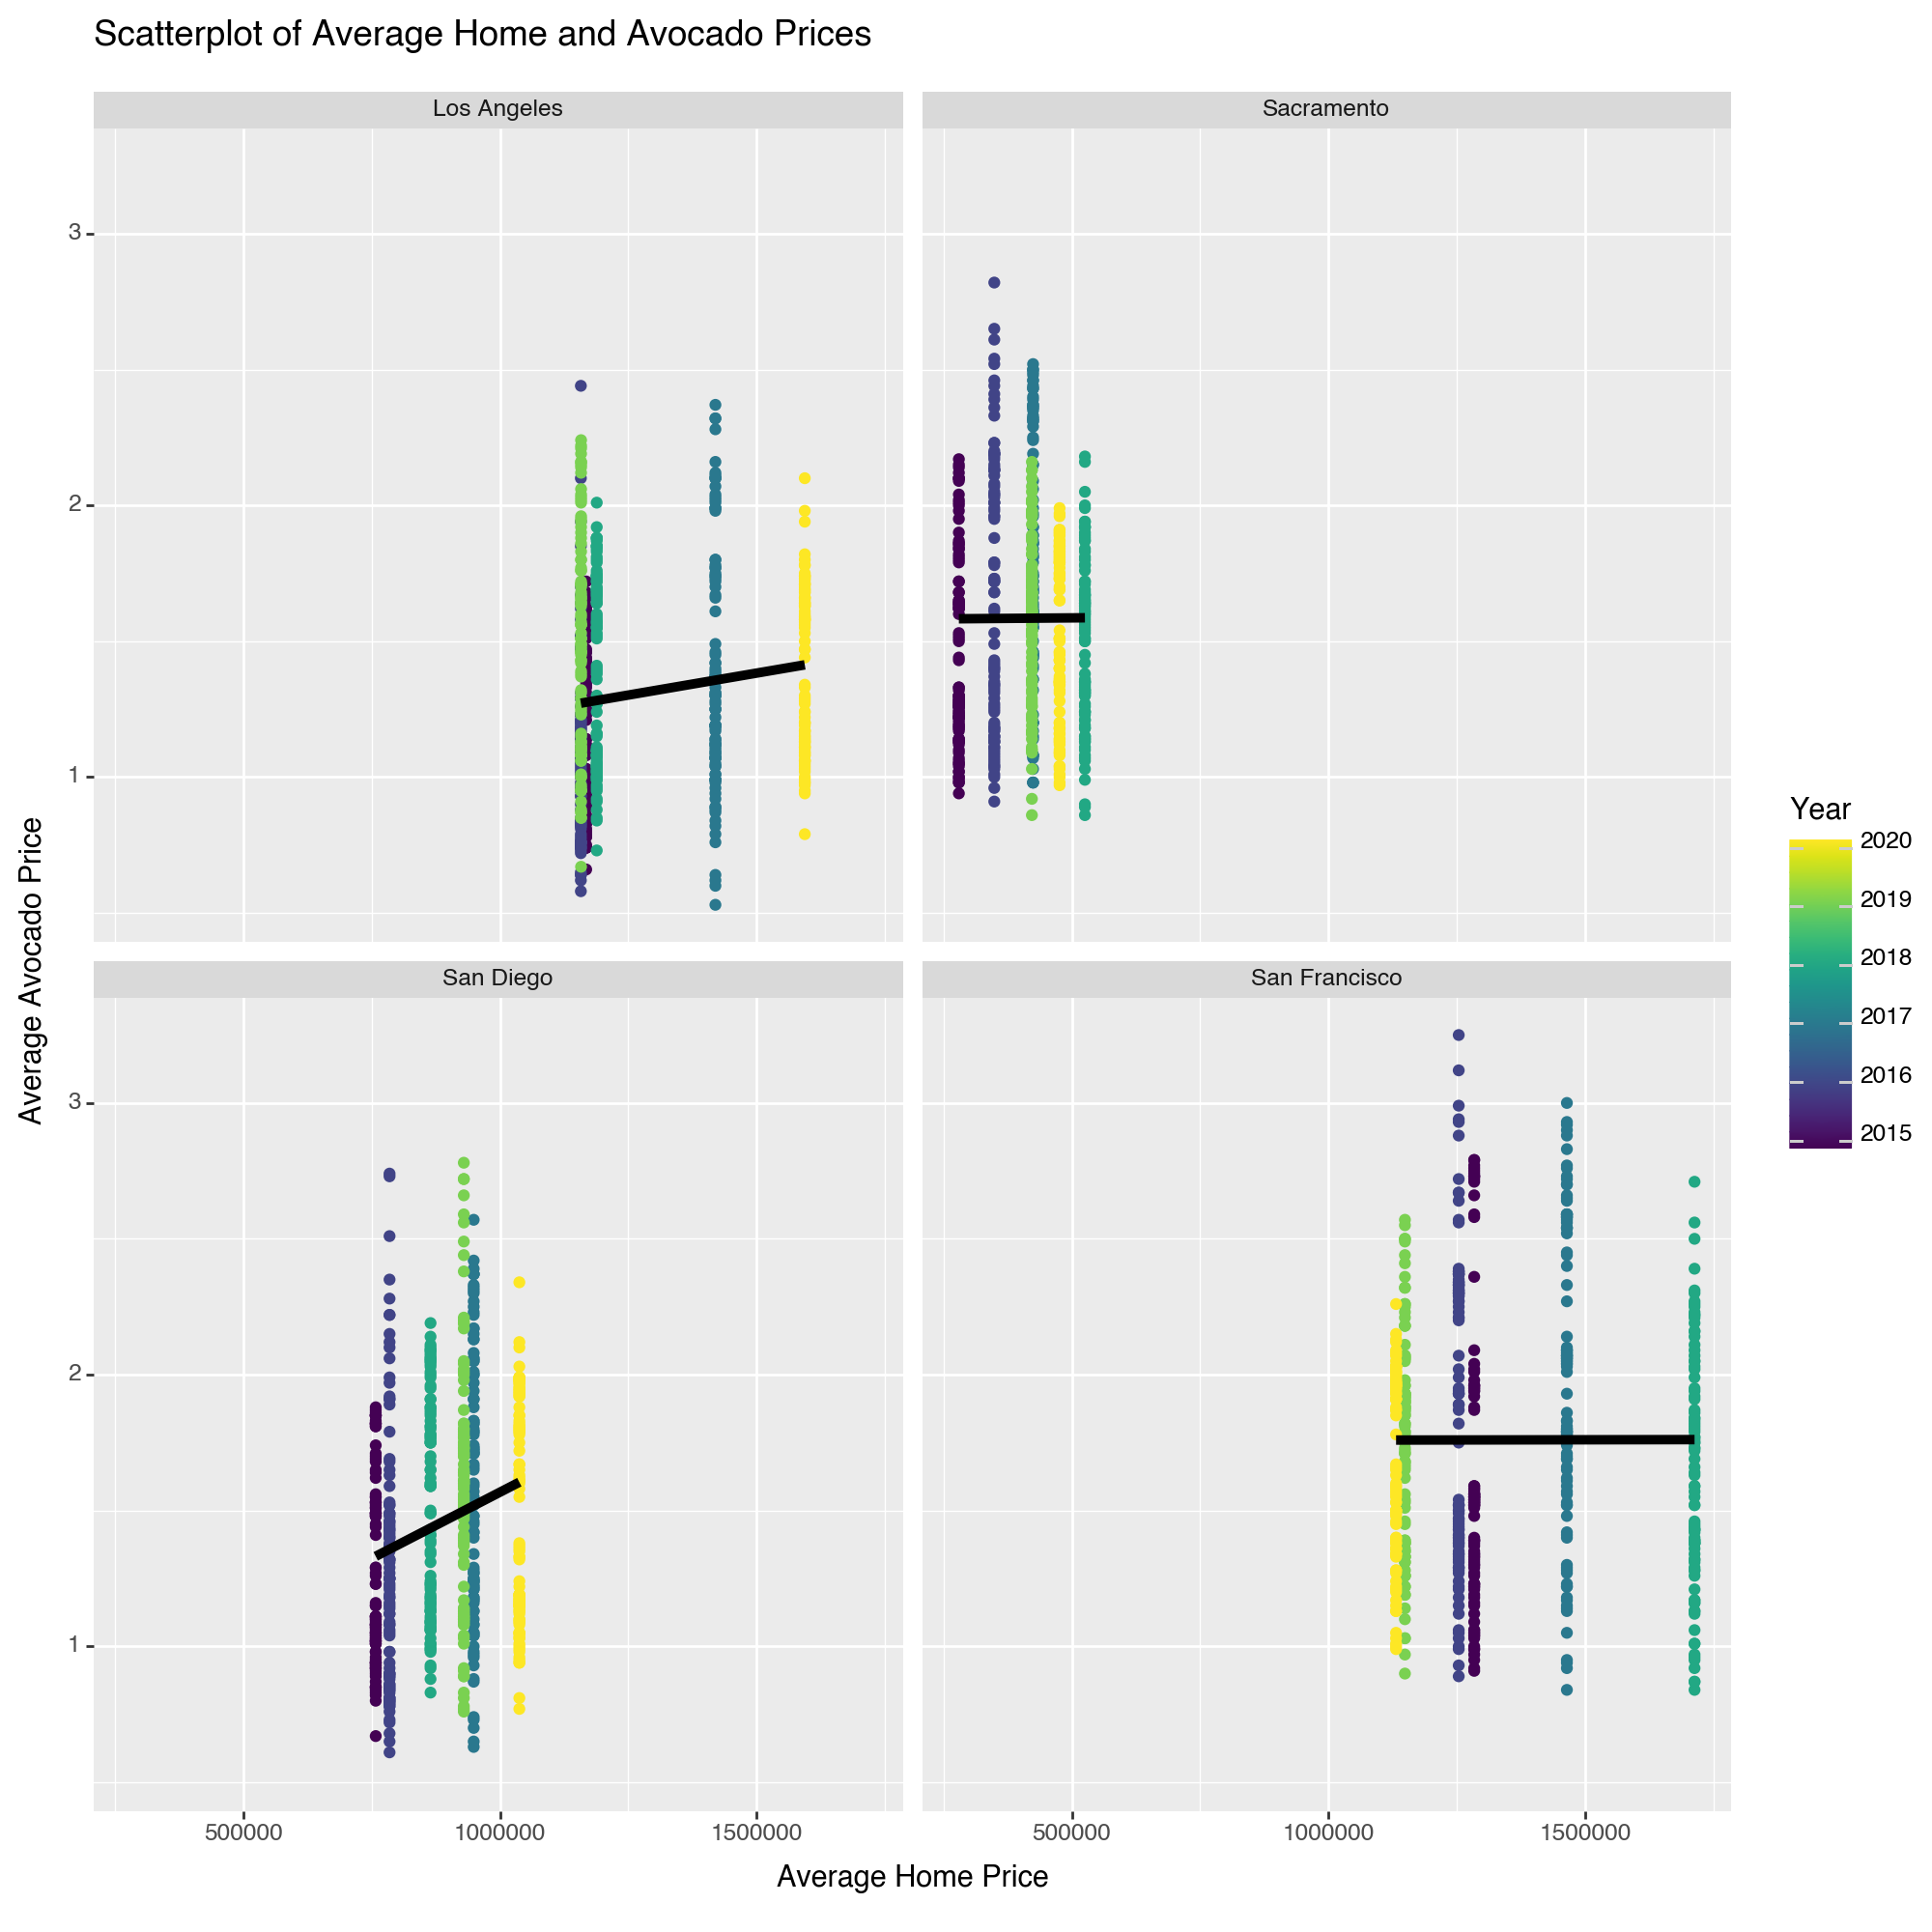

<Figure Size: (1000 x 1000)>

In [38]:
(ggplot(avohouse, aes(x = "Price", y = "average_price", color = "year")) 
 + geom_point()
 + geom_smooth(method='lm', color='black', fill = None, size = 2)
 + facet_wrap("geography")
 + labs(x = "Average Home Price", y = "Average Avocado Price", color = "Year", 
        title = "Scatterplot of Average Home and Avocado Prices")
 + theme(figure_size = (10,10)))

Argument: Some say that millennials cannot afford to buy housing because they are spending all of their money on avocado toast. 

Here we look at the data from average avocado and average home prices. Looking at the visualization, we see that in Los Angeles and San Diego, there is a positive linear relationship between average avocado and home prices. As home prices increase, avocado prices also increase. This relationship works the other way, as avocado prices increase, home prices also increase. 

However, there seems to be no relationshup in Sacramento and San Francisco. Perhaps there is a deeper relationship to be examined in the difference between Northern and Southern California. We would need further explanation and testing to be able to fully conclude with high confidence. For now, we see linear relationship between home and avocado price but only in the 2 included Southern California metropolitan regions.